# Technical indicators

In [202]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from ta import momentum, trend, volume
from alpha_vantage.techindicators import TechIndicators
from dotenv import load_dotenv
from datetime import datetime, timedelta
from alpha_vantage import timeseries

load_dotenv()
stock = 'GOOGL'

key = os.environ["ALPHA_VANTAGE_KEY"]


## Load data from file or create new file

In [203]:
try:
    df = pd.read_csv(f"{stock}.csv", index_col=0, parse_dates=[0])
    latest_timestamp = datetime.fromtimestamp(df.index[0].timestamp()).date()
    yesterday = datetime.now().date() - timedelta(days=1)
    if latest_timestamp != yesterday:
        raise Exception
except Exception:
    key = os.environ["ALPHA_VANTAGE_KEY"]
    ts = timeseries.TimeSeries(key=key, output_format="pandas")
    df, _ = ts.get_daily_adjusted(symbol=stock, outputsize="full")
    df.to_csv(f"{stock}.csv")

## SMA - Simple Moving Average

In [204]:
def get_sma(close, window=12, fillna=False):
    return trend.sma_indicator(close=close, window=window, fillna=fillna)

# Reverse the dataset to put in the oldest values first
sma = get_sma(df['5. adjusted close'][::-1])
sma = sma.dropna()

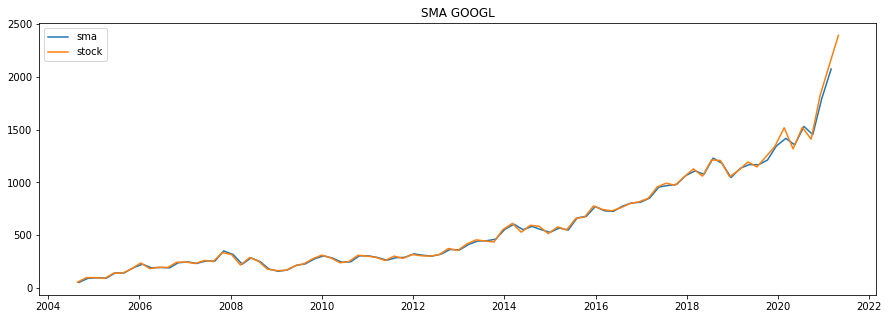

In [205]:
# Plot every 50th item

plt.figure(figsize=(15,5))
plt.plot(sma.keys()[::50], sma[::50], label="sma")
plt.plot(df.index[::50], df['5. adjusted close'][::50], label="stock")
plt.legend()
plt.title(f"SMA {stock}")
plt.show()

## EMA - Exponential Moving Average

In [206]:
def get_ema(close, window=12, fillna=True):
    return trend.ema_indicator(close=close, window=window, fillna=fillna)


# Reverse the dataset to put in the oldest values first
ema = get_ema(df['5. adjusted close'][::-1])

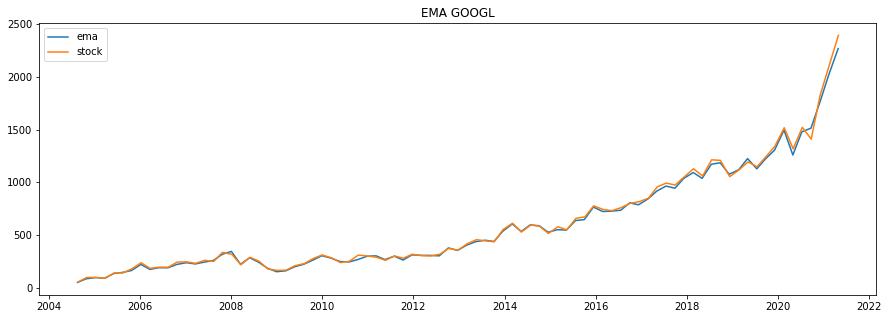

In [207]:
# Plot every 50th item
plt.figure(figsize=(15,5))
plt.plot(ema.keys()[::50], ema[::50], label='ema')
plt.plot(df.index[::50], df['5. adjusted close'][::50], label="stock")
plt.legend()
plt.title(f"EMA {stock}")
plt.show()

## ROC - Rate of Change

In [208]:
def get_roc(close, window=50, fillna=False):
    return momentum.roc(close, window=window, fillna=True)


roc = get_roc(df['5. adjusted close'][::-1])

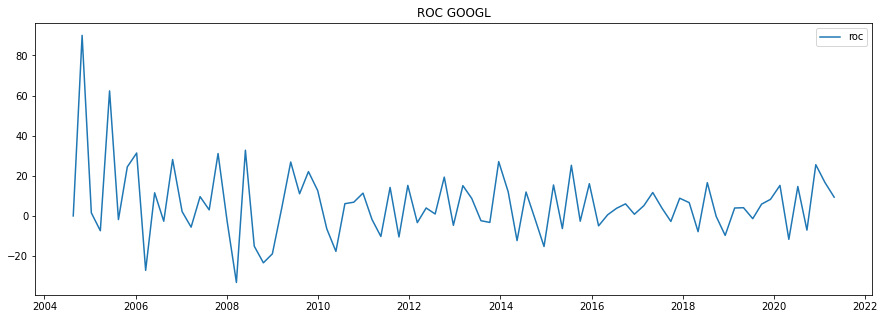

In [209]:
# Plot every 50th item
plt.figure(figsize=(15,5))
plt.plot(roc.keys()[::50], roc[::50], label='roc')
# plt.plot(df.index[::50], df['5. adjusted close'][::50], label="stock")
plt.legend()
plt.title(f"ROC {stock}")
plt.show()

## RSI - Relative Strength Indicator
> 70 = Overbought
< 30 = Oversold

In [210]:
def get_rsi(close, window=14, fillna=False):
    return momentum.rsi(close, window=window, fillna=True)

rsi = get_rsi(df['5. adjusted close'][::-1])

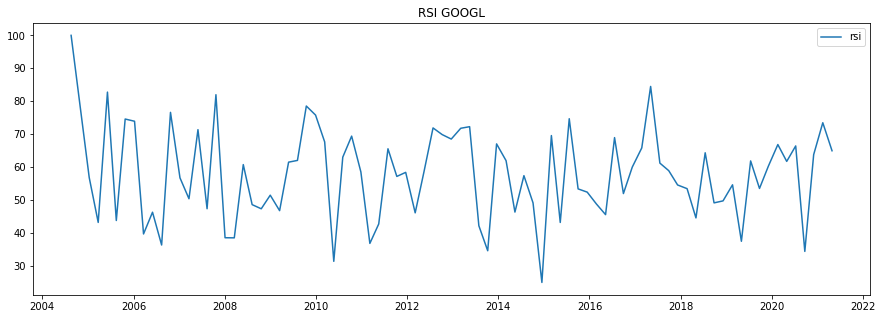

In [211]:
# Plot every 50th item
plt.figure(figsize=(15,5))
plt.plot(rsi.keys()[::50], rsi[::50], label='rsi')
# plt.plot(df.index[::50], df['5. adjusted close'][::50], label="stock")
plt.legend()
plt.title(f"RSI {stock}")
plt.show()

## OBV - On-Balance Volume

In [212]:
def get_obv(close, volume_input, fillna=False):
    return volume.on_balance_volume(close=close, volume=volume_input, fillna=False)

obv = get_obv(close=df['5. adjusted close'][::-1],volume_input=df['6. volume'][::-1])

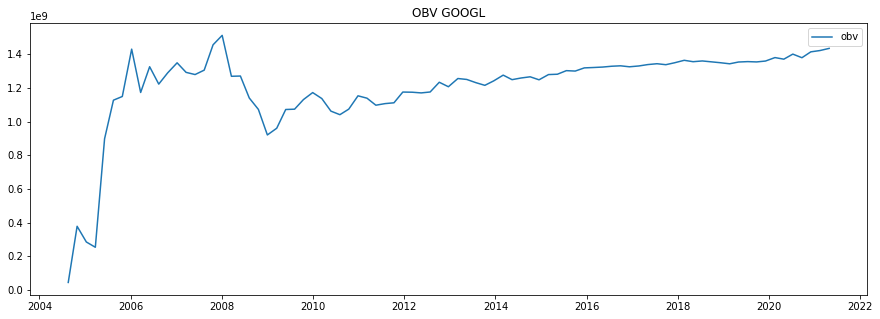

In [213]:
# Plot every 50th item
plt.figure(figsize=(15,5))
plt.plot(obv.keys()[::50], obv[::50], label='obv')
# plt.plot(df.index[::50], df['5. adjusted close'][::50], label="stock")
plt.legend()
plt.title(f"OBV {stock}")
plt.show()

## Compare calculated SMA to Alphavantage SMA

In [214]:
ti = TechIndicators(key=key, output_format="pandas")
sma_av, _ = ti.get_sma(symbol=stock, interval="daily", time_period=12, series_type="close")

In [215]:
if not isinstance(sma, pd.DataFrame):
    sma = sma.to_frame()

sma.rename(columns={"sma_12": "SMA"}, inplace=True)
sma = sma.round(decimals=4)

difference = sma_av.compare(sma)
columns = difference.columns
overall_difference = sum(abs(difference[columns[0]] - difference[columns[1]]))
print(f"Overall difference in Alphavantage vs. local calculation: {overall_difference}")


Overall difference in Alphavantage vs. local calculation: 0.0013000000000147338
